In [1]:
%load_ext autoreload
%autoreload 2

In [124]:
import numpy as np 
import pandas as pd

import pydicom as dicom
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
train_dir = Path('E:\data\RSNA2024')

In [4]:
class CFG:
    random_seed = 42
    
    ROOT_FOLDER = train_dir
    IMAGES_DIR = ROOT_FOLDER / 'train_images'
    TRAIN_CSV = ROOT_FOLDER / 'train.csv'
    FILES_CSV = ROOT_FOLDER / 'train_files.csv'
    TRAIN_DESC_CSV = ROOT_FOLDER / 'train_series_descriptions.csv'
    COORDS_CSV = ROOT_FOLDER / 'train_label_coordinates.csv'

### Train data

In [5]:
train_df = pd.read_csv(CFG.TRAIN_CSV)
train_desc_df = pd.read_csv(CFG.TRAIN_DESC_CSV)

train_df.shape, train_desc_df.shape

((1975, 26), (6294, 3))

In [6]:
train_df.head()

,study_id,SCSL1L2,SCSL2L3,SCSL3L4,SCSL4L5,SCSL5S1,LNFNL1L2,LNFNL2L3,LNFNL3L4,LNFNL4L5,...,LSSL1L2,LSSL2L3,LSSL3L4,LSSL4L5,LSSL5S1,RSSL1L2,RSSL2L3,RSSL3L4,RSSL4L5,RSSL5S1
0,4003253,N,N,N,N,N,N,N,N,M,...,N,N,N,M,N,N,N,N,N,N
1,4646740,N,N,M,S,N,N,N,N,M,...,N,N,N,S,N,N,M,M,M,N
2,7143189,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
3,8785691,N,N,N,N,N,N,N,N,M,...,N,N,N,N,N,N,N,N,N,N
4,10728036,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,M,N


In [7]:
train_df.iloc[1]

study_id    4646740
SCSL1L2           N
SCSL2L3           N
SCSL3L4           M
SCSL4L5           S
SCSL5S1           N
LNFNL1L2          N
LNFNL2L3          N
LNFNL3L4          N
LNFNL4L5          M
LNFNL5S1          M
RNFNL1L2          N
RNFNL2L3          N
RNFNL3L4          M
RNFNL4L5          M
RNFNL5S1          N
LSSL1L2           N
LSSL2L3           N
LSSL3L4           N
LSSL4L5           S
LSSL5S1           N
RSSL1L2           N
RSSL2L3           M
RSSL3L4           M
RSSL4L5           M
RSSL5S1           N
Name: 1, dtype: object

In [8]:
train_df.study_id.nunique()

1975

### Coordinates

In [9]:
coords_df = pd.read_csv(CFG.COORDS_CSV)
files_df = pd.read_csv(CFG.FILES_CSV)

coords_df.shape, files_df.shape

((48692, 16), (147218, 13))

In [10]:
coords_df.condition.nunique(), coords_df.level.nunique()

(5, 5)

In [388]:
coords_df.condition.unique(), coords_df.level.unique()

(array(['SCS', 'RNFN', 'LNFN', 'LSS', 'RSS'], dtype=object),
 array(['L1L2', 'L2L3', 'L3L4', 'L4L5', 'L5S1'], dtype=object))

In [12]:
coords_df.study_id.nunique(), coords_df.series_id.nunique()

(1974, 6291)

In [13]:
# coords_df['id'] = coords_df.apply(lambda row: str(row['study_id']) + str(row['series_id']), axis=1)
train_desc_df['id'] = train_desc_df.apply(lambda row: str(row['study_id']) + str(row['series_id']), axis=1)

In [14]:
coords_df.sample(2)

,study_id,series_id,instance,condition,level,x,y,ss_id,instance_id,cl,plane,rows,columns,filename,x_perc,y_perc
19022,1713964051,40498574,8,SCS,L4L5,178.350725,180.438185,1713964051_40498574,1713964051_40498574_8,SCSL4L5,Sagittal T2/STIR,320,320,E:\data\RSNA2024\pngs_256\1713964051_40498574_...,0.557346,0.563869
10517,943718301,1892030153,11,RNFN,L2L3,188.706545,150.374486,943718301_1892030153,943718301_1892030153_11,RNFNL2L3,Sagittal T1,320,320,E:\data\RSNA2024\pngs_256\943718301_1892030153...,0.589708,0.469920


In [15]:
train_desc_df[train_desc_df['id'] == '4003253702807833'].series_description.values[0]

'Sagittal T2/STIR'

In [391]:
# pd.crosstab(coords_df.plane, coords_df.cl)

cl,LNFNL1L2,LNFNL2L3,LNFNL3L4,LNFNL4L5,LNFNL5S1,LSSL1L2,LSSL2L3,LSSL3L4,LSSL4L5,LSSL5S1,...,RSSL1L2,RSSL2L3,RSSL3L4,RSSL4L5,RSSL5S1,SCSL1L2,SCSL2L3,SCSL3L4,SCSL4L5,SCSL5S1
plane,,,,,,,,,,,,,,,,,,,,,
Axial T2,0,0,0,0,0,1810,1892,1971,1971,1964,...,1812,1891,1971,1971,1967,0,0,0,0,0
Sagittal T1,1972,1972,1972,1972,1972,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
Sagittal T2/STIR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1903,1933,1972,1971,1969


In [389]:
pd.crosstab(coords_df.condition, coords_df.plane)

plane,Axial T2,Sagittal T1,Sagittal T2/STIR
condition,,,
LNFN,0,9860,0
LSS,9608,0,0
RNFN,0,9859,0
RSS,9612,0,0
SCS,0,5,9748


In [17]:
# get the positive slices
coords_df.groupby(['study_id','series_id']).instance.unique()

study_id    series_id 
4003253     702807833                              [8]
            1054713880               [4, 5, 6, 11, 12]
            2448190387          [3, 4, 11, 19, 28, 35]
4646740     3201256954    [15, 16, 22, 28, 29, 34, 40]
            3486248476           [5, 6, 7, 15, 16, 17]
                                      ...             
4287160193  1507070277                             [8]
            1820446240          [4, 9, 10, 16, 22, 28]
4290709089  3274612423                             [9]
            3390218084    [2, 3, 5, 6, 10, 15, 20, 21]
            4237840455                  [4, 5, 11, 12]
Name: instance, Length: 6291, dtype: object

In [18]:
# total positive images 
coords_df.instance_id.nunique()

24546

In [55]:
# mean pos images per patient
coords_df.instance_id.nunique()/coords_df.study_id.nunique(), coords_df.groupby(['study_id']).instance_id.nunique().mean()

(12.434650455927052, 12.434650455927052)

In [19]:
# total labels
pos_slices = coords_df.groupby(['study_id','series_id']).instance.unique().apply(list).reset_index(name='slice').explode('slice')
pos_slices.shape

(24546, 3)

In [20]:
# coords_df[coords_df.instance_number > 100]

In [21]:
pos_slices

,study_id,series_id,slice
0,4003253,702807833,8
1,4003253,1054713880,4
1,4003253,1054713880,5
1,4003253,1054713880,6
1,4003253,1054713880,11
...,...,...,...
6289,4290709089,3390218084,21
6290,4290709089,4237840455,4
6290,4290709089,4237840455,5
6290,4290709089,4237840455,11


In [22]:
pos_slices.groupby('study_id').slice.nunique().mean()/3

3.6653157716987503

### train_df

In [23]:
# look at categories
for f in ['condition','level']:
    print(coords_df[f].value_counts())
    print('-'*50);print();

condition
LNFN    9860
RNFN    9859
SCS     9753
RSS     9612
LSS     9608
Name: count, dtype: int64
--------------------------------------------------

level
L3L4    9858
L4L5    9858
L5S1    9845
L2L3    9661
L1L2    9470
Name: count, dtype: int64
--------------------------------------------------



In [24]:
pd.crosstab(coords_df.condition, coords_df.level)

level,L1L2,L2L3,L3L4,L4L5,L5S1
condition,,,,,
LNFN,1972,1972,1972,1972,1972
LSS,1810,1892,1971,1971,1964
RNFN,1972,1972,1971,1972,1972
RSS,1812,1891,1971,1971,1967
SCS,1904,1934,1973,1972,1970


### Files

In [25]:
files_df.head(3)

,study_id,series_id,image,instancenumber,rows,columns,slicethickness,spacingbetweenslices,patientposition,seriesdescription,ss_id,instance_id,filename
0,100206310,1012284084,1,1,320,320,3.5,3.5,HFS,T2,100206310_1012284084,100206310_1012284084_1,E:\data\RSNA2024\pngs_256\100206310_1012284084...
1,100206310,1012284084,10,10,320,320,3.5,3.5,HFS,T2,100206310_1012284084,100206310_1012284084_10,E:\data\RSNA2024\pngs_256\100206310_1012284084...
2,100206310,1012284084,11,11,320,320,3.5,3.5,HFS,T2,100206310_1012284084,100206310_1012284084_11,E:\data\RSNA2024\pngs_256\100206310_1012284084...


In [26]:
files_df.rows.min(), files_df.rows.max(), files_df['columns'].min(), files_df['columns'].max(), 

(192, 1024, 224, 1024)

In [27]:
# files_df.image.max(), files_df.image.mean()

In [28]:
# file names do not correspond to file count
files_df[files_df.image == 5049]

,study_id,series_id,image,instancenumber,rows,columns,slicethickness,spacingbetweenslices,patientposition,seriesdescription,ss_id,instance_id,filename
59719,2581283971,2683794967,5049,5049,320,320,4.0,5.0,FFS,T2,2581283971_2683794967,2581283971_2683794967_5049,E:\data\RSNA2024\pngs_256\2581283971_268379496...


#### Patient positions

In [62]:
files_df.patientposition.unique()

array(['HFS', 'FFS'], dtype=object)

In [63]:
files_df.patientposition.value_counts()

patientposition
HFS    118249
FFS     28969
Name: count, dtype: int64

In [64]:
files_df.groupby(['study_id']).patientposition.unique().value_counts()

patientposition
[HFS]    1585
[FFS]     390
Name: count, dtype: int64

In [408]:
# some studies have more series
grp = files_df.groupby('study_id').filter(lambda group: group.series_id.nunique() > 3).study_id
multi_studies = grp.unique().tolist()
grp.nunique(), len(multi_studies), files_df.study_id.nunique()

(340, 340, 1975)

#### Positive labels

In [31]:
# max/mean images per patient
files_df.groupby(['study_id','series_id']).image.count().max(), files_df.groupby(['study_id','series_id']).image.count().mean()

(192, 23.390212901175722)

In [61]:
# mean positive imgs per series
grp = coords_df.groupby(['study_id'])
grp.instance_id.nunique().mean(), grp.instance_id.nunique().max(), grp.instance_id.nunique().min()

(12.434650455927052, 22, 6)

In [56]:
# mean positive imgs per series
coords_df.groupby(['study_id','series_id']).instance_id.nunique().mean()

3.9017644253695756

In [394]:
# img per series
coords_df.groupby(['study_id','series_id']).instance_id.count().mean()

7.739945954538229

In [38]:
files_df.groupby(['study_id','series_id']).series_id.count()

study_id    series_id 
4003253     702807833     15
            1054713880    15
            2448190387    43
4646740     3201256954    54
            3486248476    17
                          ..
4287160193  1507070277    15
            1820446240    42
4290709089  3274612423    15
            3390218084    23
            4237840455    15
Name: series_id, Length: 6294, dtype: int64

### Analyze one example

In [34]:
patient = 4003253
train_df[train_df['study_id'] == patient].iloc[0]

study_id    4003253
SCSL1L2           N
SCSL2L3           N
SCSL3L4           N
SCSL4L5           N
SCSL5S1           N
LNFNL1L2          N
LNFNL2L3          N
LNFNL3L4          N
LNFNL4L5          M
LNFNL5S1          N
RNFNL1L2          N
RNFNL2L3          N
RNFNL3L4          M
RNFNL4L5          M
RNFNL5S1          N
LSSL1L2           N
LSSL2L3           N
LSSL3L4           N
LSSL4L5           M
LSSL5S1           N
RSSL1L2           N
RSSL2L3           N
RSSL3L4           N
RSSL4L5           N
RSSL5S1           N
Name: 0, dtype: object

In [35]:
coords_df[coords_df['study_id'] == patient].condition.unique()

array(['SCS', 'RNFN', 'LNFN', 'LSS', 'RSS'], dtype=object)

In [42]:
coords_df[coords_df['study_id'] == patient][['instance', 'cl', 'condition']]

,instance,cl,condition
0,8,SCSL1L2,SCS
1,8,SCSL2L3,SCS
2,8,SCSL3L4,SCS
3,8,SCSL4L5,SCS
4,8,SCSL5S1,SCS
5,4,RNFNL4L5,RNFN
6,4,RNFNL5S1,RNFN
7,5,RNFNL3L4,RNFN
8,6,RNFNL1L2,RNFN
9,6,RNFNL2L3,RNFN


### Visualisations

In [186]:
files_df.patientposition.isna().sum()

0

In [69]:
files_df.groupby(['study_id']).patientposition.unique().value_counts()

patientposition
[HFS]    1585
[FFS]     390
Name: count, dtype: int64

In [134]:
files_df.seriesdescription.unique()

array(['T2', 'T1', nan, 'STIR'], dtype=object)

In [138]:
files_df.seriesdescription.value_counts(), files_df.seriesdescription.isna().sum()

(seriesdescription
 T2      96723
 T1      27688
 STIR       14
 Name: count, dtype: int64,
 22793)

In [87]:
files_df.sample(1)

,study_id,series_id,image,instancenumber,rows,columns,slicethickness,spacingbetweenslices,patientposition,seriesdescription,ss_id,instance_id,filename
33400,1883368654,2427085781,16,16,340,320,4.0,4.0,HFS,T1,1883368654_2427085781,1883368654_2427085781_16,E:\data\RSNA2024\pngs_256\1883368654_242708578...


In [175]:
coords_df.plane.unique()

array(['Sagittal T2/STIR', 'Sagittal T1', 'Axial T2'], dtype=object)

In [195]:
coords_df[(coords_df['study_id'] == 1883368654) & (coords_df['plane'] == 'Sagittal T1')].sample()

,study_id,series_id,instance,condition,level,x,y,ss_id,instance_id,cl,plane,rows,columns,filename,x_perc,y_perc
21113,1883368654,2427085781,15,LNFN,L4L5,145.582723,203.31837,1883368654_2427085781,1883368654_2427085781_15,LNFNL4L5,Sagittal T1,340,320,E:\data\RSNA2024\pngs_256\1883368654_242708578...,0.454946,0.597995


#### image orientations

In [348]:
def get_dcoms(study_id, source=CFG.IMAGES_DIR):
    files = []

    # for t in ['T1', 'T2']:
    for t in ['Sagittal T1', 'Axial T2']:
        # samp = files_df[(files_df['study_id'] == study_id) & (files_df['seriesdescription'] == t)].sample(1)
        samp = coords_df[(coords_df['study_id'] == study_id) & (coords_df['plane'] == t)].sample(1) 
        series_id = samp.series_id.values[0]
        
        samp = files_df[(files_df['study_id'] == study_id) & (files_df['series_id'] == series_id)].sample(1)
        image = samp.image.values[0]
    
        filename = source / str(study_id) / str(series_id) / f'{image}.dcm'

        files.append(filename)

    return files
    

def plot_dcom(files, title='title'):
    cols = 5
    rows = len(files) // cols +1
    if len(files) < cols:
        cols = len(files) % cols
        # rows += 1

    fig, axs = plt.subplots(rows, cols, figsize=(15, 3*rows))
    fig.suptitle(title)

    for idx, ax in enumerate(axs.flat):
        if idx +  1 > len(files):
            break

        ax.margins(0, 0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
        ds = dicom.dcmread(files[idx])
        img = ds.pixel_array

        # img = (img - img.min()) / (img.max() - img.min())

        if ds.PhotometricInterpretation == "MONOCHROME1":
            img = 1 - img
    
        ax.imshow(img, cmap="gray")

    plt.show()

In [331]:
hfs = files_df[files_df['patientposition'] == 'HFS'].sample(1).study_id.values[0]
ffs = files_df[files_df['patientposition'] == 'FFS'].sample(1).study_id.values[0]

hfs, ffs

(1307961168, 857629562)

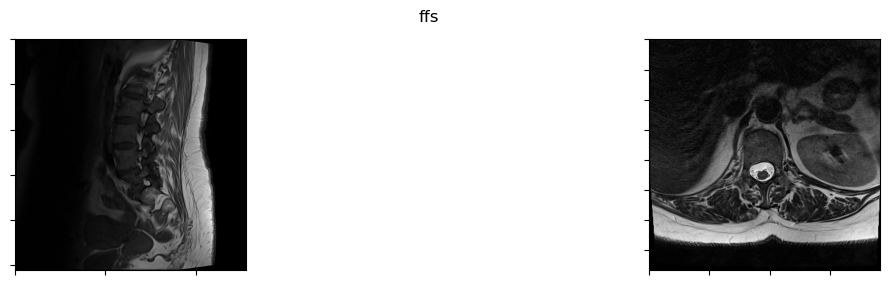

In [349]:
files = get_dcoms(ffs)
plot_dcom(files, title='ffs')

2 1


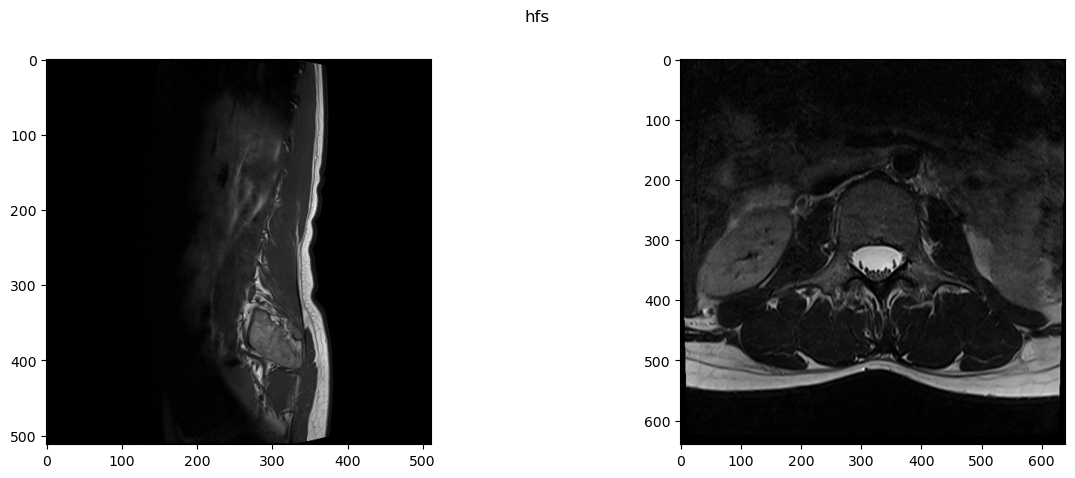

In [325]:
files = get_dcoms(hfs)
plot_dcom(files, title='hfs')

#### Sorting

In [343]:
study_id = files_df.sample(1).study_id.values[0]

study_id

29931867

In [260]:
series_id = files_df[files_df['study_id'] == study_id].sample(1).series_id.values[0]

series_id

1482718348

In [284]:
imgs = files_df[files_df['series_id'] == 1482718348].image.to_list()

In [334]:
def plot_series(study_id, source=CFG.IMAGES_DIR):
    series_id = files_df[files_df['study_id'] == study_id].sample(1).series_id.values[0]

    imgs = files_df[files_df['series_id'] == series_id].image.to_list()
    imgs.sort()

    files = [source / str(study_id) / str(series_id) / f'{image}.dcm' for image in imgs]

    plot_dcom(files, title=f'{series_id} {len(files)} images')

HFS


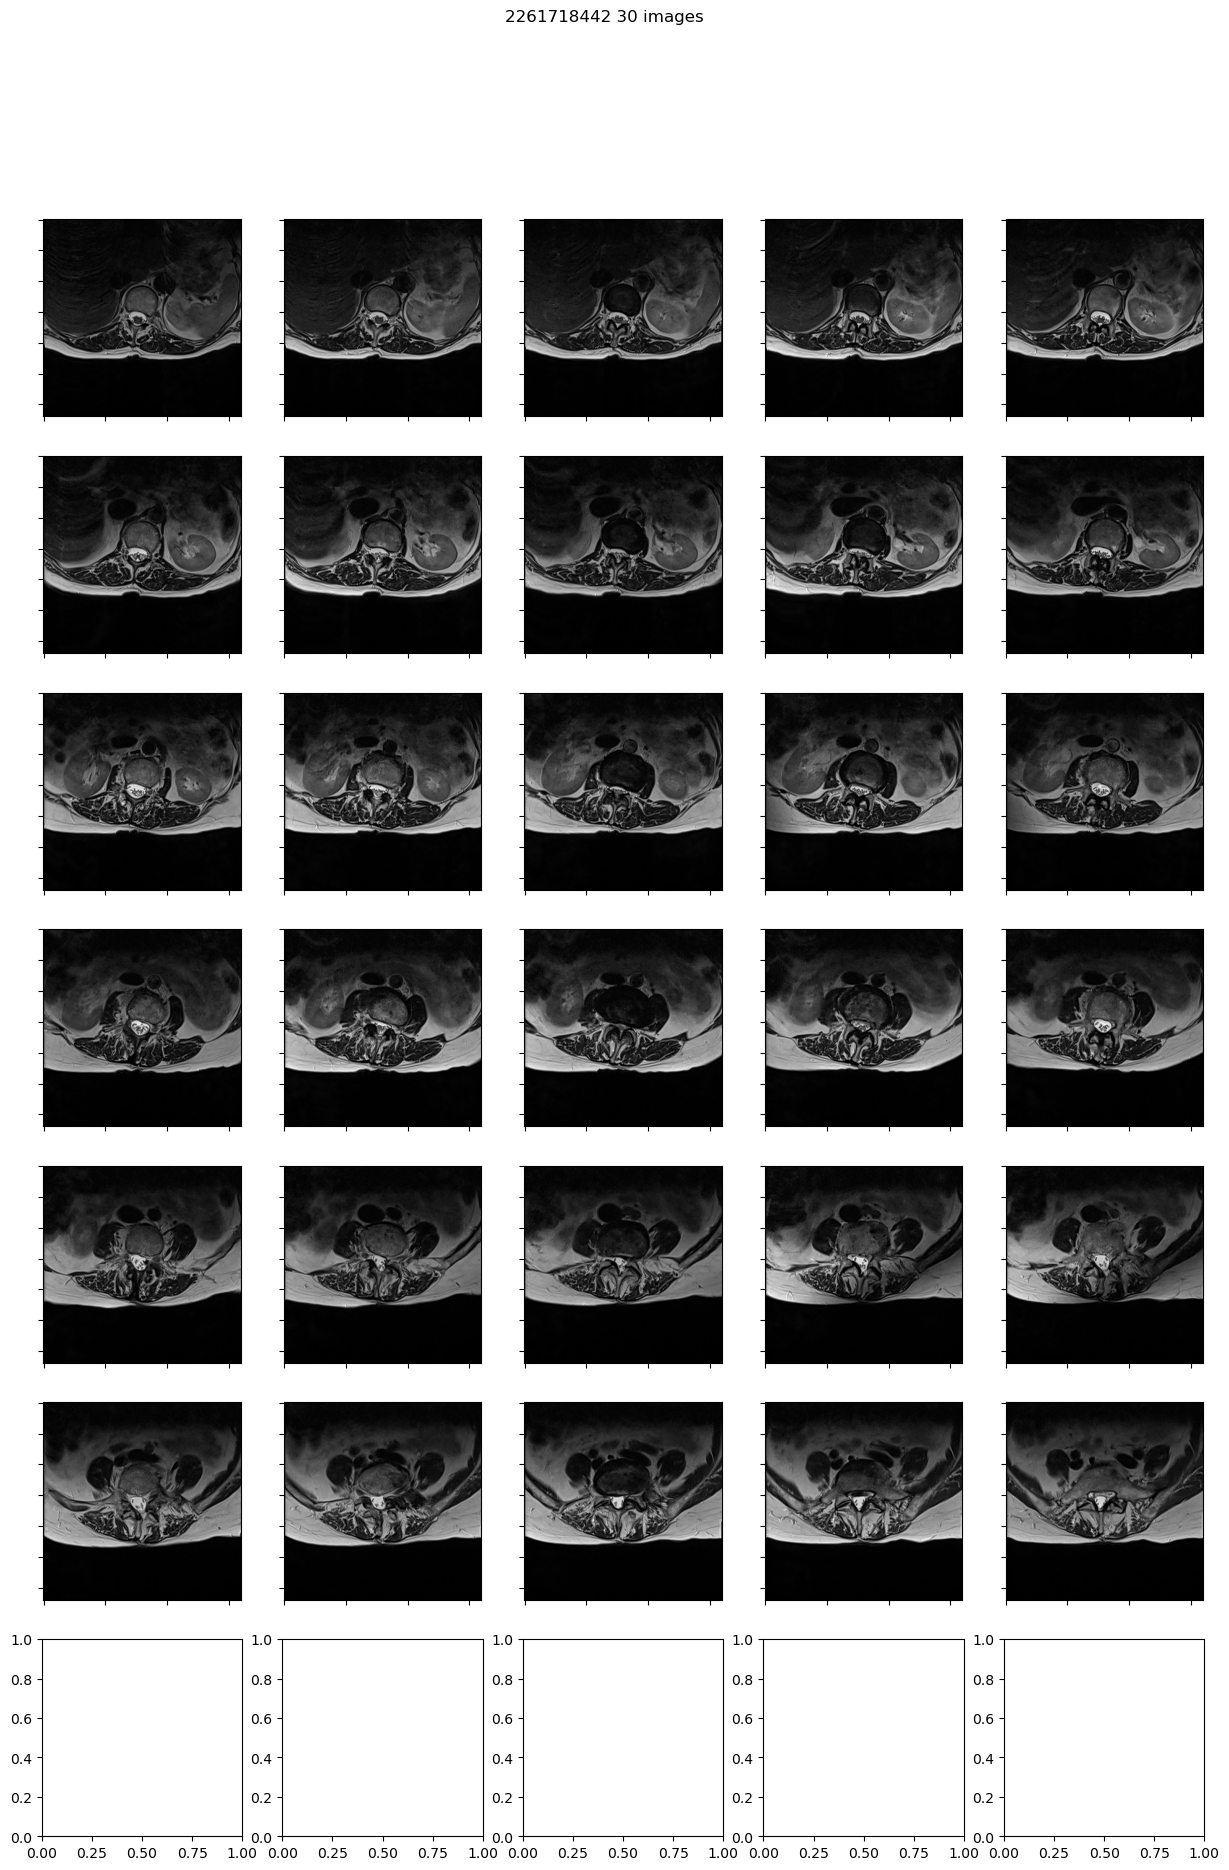

In [392]:
study_id = 29931867

print(files_df[files_df['study_id'] == study_id].sample(1).patientposition.values[0])

plot_series(study_id)